In [91]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [92]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
df=pd.DataFrame(boston.data)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Q1: Save the dataset into pandas dataframe

In [62]:
from sklearn.datasets import load_boston
boston = load_boston()

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['Price'] = boston.target

df_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Q2: Use different histograms to plot features that have right, left and zero skew.

<AxesSubplot:ylabel='Count'>

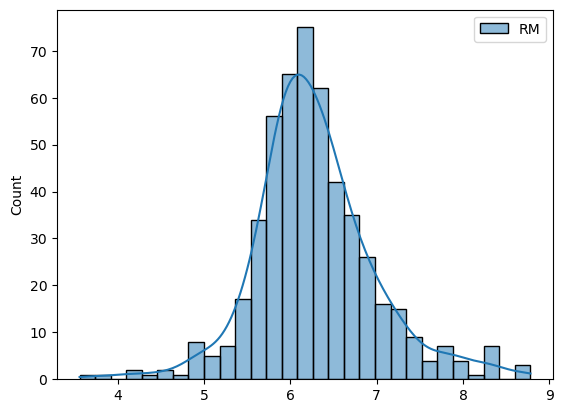

In [66]:

sns.histplot(df_boston[['RM']], kde=True)


<AxesSubplot:ylabel='Count'>

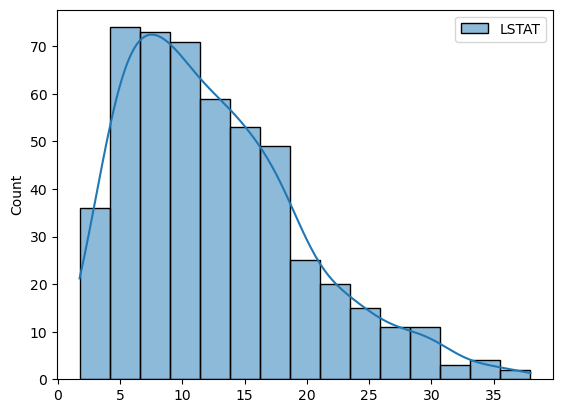

In [68]:
sns.histplot(df_boston[['LSTAT']], kde=True)



<AxesSubplot:ylabel='Count'>

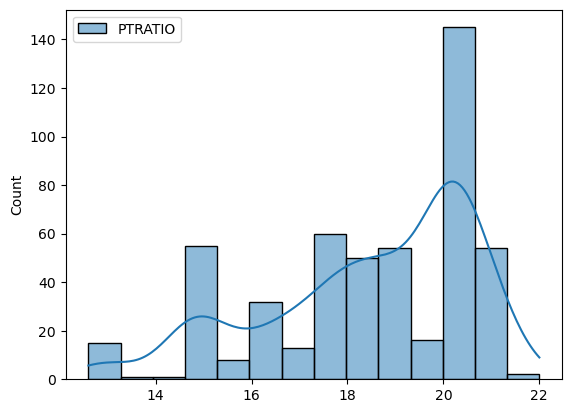

In [69]:
  sns.histplot(df_boston[['PTRATIO']], kde=True)

## Q3: Prove your previous result using mean, median and mode.

In [74]:
print("Mean = ", df_boston['RM'].mean())
print("Median = ", df_boston['RM'].median())
print("Mode = ", df_boston['RM'].mode().values[0])

Mean =  6.284634387351787
Median =  6.2085
Mode =  5.713


In [71]:
print("Mean of LSTAT = ", df_boston['LSTAT'].mean())
print("Median of LSTAT = ", df_boston['LSTAT'].median())
print("Mode of LSTAT = ", df_boston['LSTAT'].mode().values[0])


Mean of LSTAT =  12.653063241106723
Median of LSTAT =  11.36
Mode of LSTAT =  6.36


In [73]:
print("Mean of PTRATIO = ", df_boston['PTRATIO'].mean())
print("Median of PTRATIO = ", df_boston['PTRATIO'].median())
print("Mode of PTRATIO = ", df_boston['PTRATIO'].mode().values[0])

Mean of PTRATIO =  18.455533596837967
Median of PTRATIO =  19.05
Mode of PTRATIO =  20.2


## Q4: Use Skew function of Pandas to print skewness of each feature.

In [83]:
skewness_features= df_boston.skew().sort_values(ascending=False)
skewness_features


CRIM       5.223149
CHAS       3.405904
ZN         2.225666
Price      1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

## Q5: Use numpy to draw normal distribution.

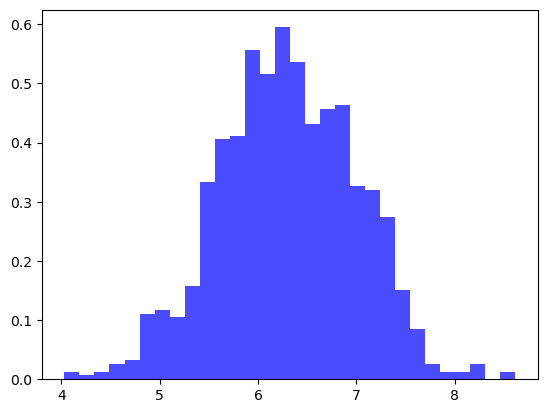

In [87]:

data = df_boston['RM']
mu, sigma = data.mean(), data.std()
s = np.random.normal(mu, sigma, 1000)

plt.hist(s, bins=30, density=True, alpha=0.7, color='blue')
plt.show()

## Q6: Use numpy to draw uniform distribution.

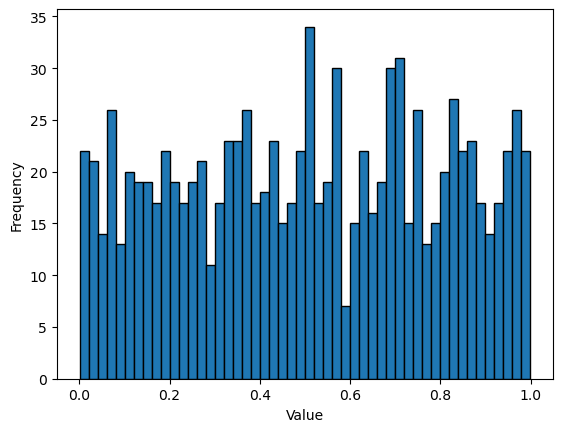

In [93]:
samples = np.random.uniform(low=0, high=1, size=1000)
plt.hist(samples, bins=50, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Q7: Use numpy to draw binomial distribution.

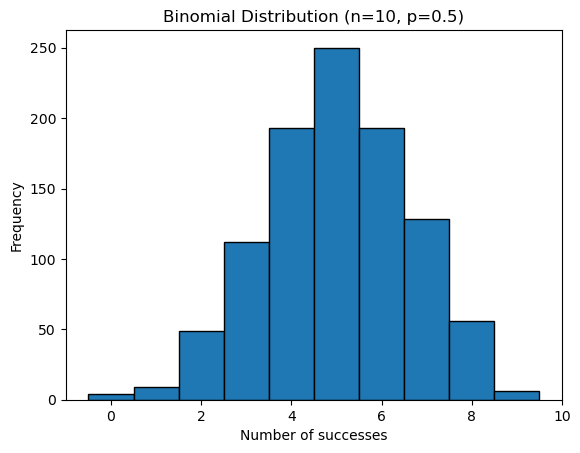

In [94]:
n, p = 10, 0.5
data = np.random.binomial(n, p, 1000) 

plt.hist(data, bins=np.arange(0, n+1), edgecolor='black', align='left')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.show()

## Q8: Simulate Two Coin Flips, then draw the result distribution.

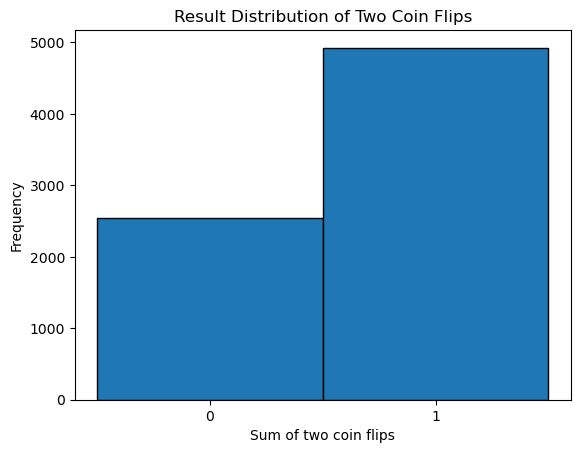

In [95]:
n_samples = 10000
flips = np.random.randint(0, 2, size=(n_samples, 2))
results = np.sum(flips, axis=1)

plt.hist(results, bins=np.arange(3) - 0.5, edgecolor='black')
plt.xticks(np.arange(2))
plt.xlabel('Sum of two coin flips')
plt.ylabel('Frequency')
plt.title('Result Distribution of Two Coin Flips')
plt.show()

## Thank You